### Téléchargement du dataset
Premièrement il faut télécharger le dataset et le stocker dans notre drive

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from pylab import Line2D, gca
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import zipfile
from math import sin, cos, sqrt, atan2, radians
from keras import optimizers
from keras.models import Sequential
from keras import backend as K
from keras.layers import Dense
import tensorflow as tf
import pickle
from sklearn.linear_model import LinearRegression
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
K.set_session(sess) 



if not os.path.isfile("train.zip"):
    !wget -O "train.zip" "https://storage.googleapis.com/kagglesdsdata/competitions/6960/44258/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583705071&Signature=IJzlHVeN3XDjUgoqdgq1WvSrVwNmwKEzYXco4Y5XBjBVlN4pgG5k5tC%2B0AruTagZ%2BbsbmGMT1rkoxfO3U3CQ8xnzp1Zc6wXpo0UaRROkI7QdMNMt26NnGqGayMpB0Rdi19Okr4Yo6KfsVVuotHd115QIeMgnEzwEPFCTOI86j6k8RMab7cK7rmdHr%2FQuCnJVCEOk43gWmp%2BS7KuoZXPYYUVhwM6XEvaibEF9eIYOKT3SA5WQrDsYo1IFX7xJTGX9dDCIcntqq%2FZOe1XP%2BLaeAIEL9FWuORUTUoAmHabHZgGuc8QIxsZFzNbh6m6CjcX0UQIWRk%2F5WbTGjl6Ris65%2Fg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip"
    !wget -O "sample_submission.zip" "https://storage.googleapis.com/kagglesdsdata/competitions/6960/44258/sample_submission.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583803062&Signature=n1b3wCaTQwE3aQ7%2FQm0LmxpOtE%2FaYVrSzrofDFcNRMLcVnfSE6d4JQqISLUPTcySqxDX%2Fiwveey7tZSfBt%2F83JTDzfRu4cVFGhhEKwsV9QoJ0uRyToBLeqswm35vDsxSRBUKPvmDhZAIDtmttbwFCxLh%2F63T5JfZVeZSiudZvnoVvGBGeOVViAJSlyBJ%2B0qFnP%2FbJKSRonWjL50v02np%2BWh08%2F%2BXcfjt05PY8UvaxUZHgLWTwzdzvjWIEwEkpUcAfOMbYyMb1A4%2FeJJwPLKr6H0P5D1XYHWcx4hdj%2BWzwP%2FZlBd3Al5b0HRDsmV%2FJGX8sHA%2FORDZqy%2Fad5Tt14KLtA%3D%3D&response-content-disposition=attachment%3B+filename%3Dsample_submission.zip"
    !wget -O "test.zip" "https://storage.googleapis.com/kagglesdsdata/competitions/6960/44258/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583801737&Signature=hSO5pseArkbUDGNaBErduSRb7Qq%2FiV6owMEnvbE%2F8uNoJr%2BmA4FiKNslINvd49L2TJkx3WR5DKCedB5PVbGGRQdueFRidT8dWL2vqPNhZxMHxRRSSGfoDM9pULWJvC2cEmnKJJ8TqvXHy8oAr0rMPpmXgW1gMP5uKdGm3wBoTyaTyznQyXJjmwbzCFk4ks2gOxJiZ%2FWLc5qPK6qrsUnjbfm%2BRz%2BljWSjSTlkvn8X6nQ1x4Ygzbp5aR2kLXSKp41TPDSslqJCtGPNY46%2BPDaJYpikyd07ghMNAG2iwFRuWejWLuvEcS8h%2B%2B9Vew7pQjmwOWUurti5QQKv%2FhXftXxl1w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.zip"

Using TensorFlow backend.
/home/rayansamyramoul/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rayansamyramoul/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rayansamyramoul/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rayansamyramoul/.local/lib/pytho

## Extraction
Le dataset étant sous forme d'un fichier CSV, lui même compressé dans un ZIP il faut procéder à son extraction

In [2]:

if not os.path.isfile("train.csv"):
    with zipfile.ZipFile("train.zip", 'r') as zip_ref:
        zip_ref.extractall(".")
    with zipfile.ZipFile("test.zip", 'r') as zip_ref:
        zip_ref.extractall(".")
    with zipfile.ZipFile("sample.zip", 'r') as zip_ref:
        zip_ref.extractall(".")

# Lecture
On obtient alors un fichier .csv que l'on peut traiter grace à la librairie pandas, on l'importe puis on configure le nombre de colonnes et de lignes que l'on pourra voir à l'avenir sur l'output. Enfin on affiche les 5 premiers éléments du dataset.


In [3]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)
print(df.head())
print("Plus long voyage  :"+str(df["trip_duration"].max()))

          id  vendor_id      pickup_datetime     dropoff_datetime  passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30                1        -73.982155        40.767937         -73.964630         40.765602                  N            455
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38                1        -73.980415        40.738564         -73.999481         40.731152                  N            663
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48                1        -73.979027        40.763939         -74.005333         40.710087                  N           2124
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40                1        -74.010040        40.719971         -74.012268         40.706718                  N            429
4  id2181028          2  2016-03-26 13:30:55  2016-03-2

### Représentation des durées de voyage
Certains voyages étant très longues on applique la fonction logarithmique pour avoir une meilleure visualisation des durées lorsque l'on dessine la courbe de distribution.

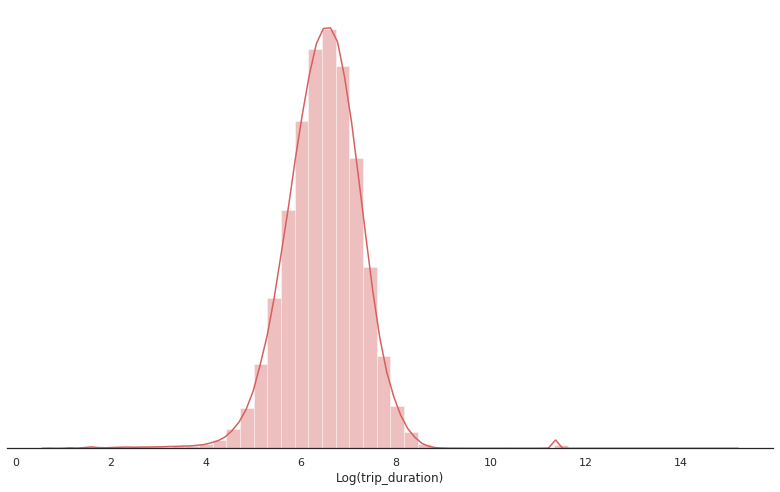

In [4]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()

### Dates
Il est intéréssant de récupérer le jour du week-end associé à chaque voyage, on peut facilement imaginer que cela a une correlation.
Pareil pour l'heure pour tout ce qui est heures de pointe, ainsi que le  jour de l'année (pour le jours fériés).

In [5]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df.loc[:, 'pick_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pick_hour'] = df['pickup_datetime'].dt.hour
df.loc[:,'pick_year'] = df['pickup_datetime'].dt.year
df.loc[:, 'day_of_year'] = df['pickup_datetime'].dt.dayofyear
df.loc[:, 'pick_day_week'] = df['pickup_datetime'].dt.dayofweek


Text(0, 0.5, 'Moyenne de Durée de voyage')

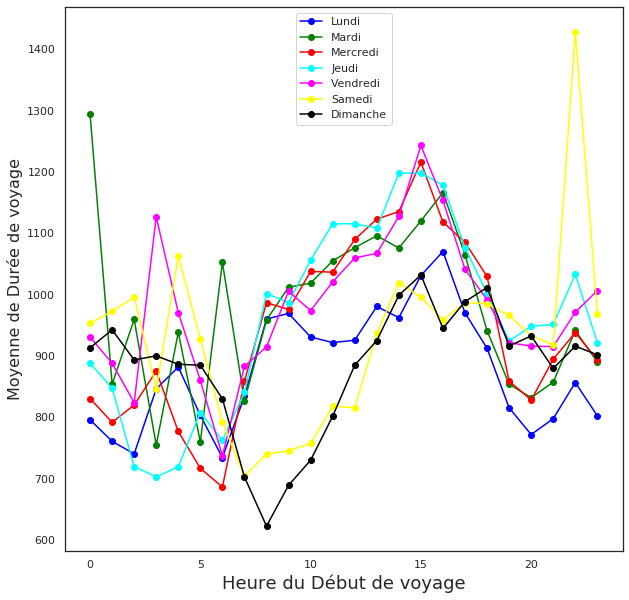

In [6]:
days = [0,1,2,3,4,5,6]
jours = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
fig = plt.figure(figsize=(10,10))
colors = ['blue','green','red','cyan','magenta','yellow','black', 'grey', 'brown', 'olive','orange']
dfs_days = []
for i in days:
    tmp = df[df['pick_day_week'] == i]
    pick_hours = np.sort(tmp.pick_hour.unique())
    durations = []
    for j in pick_hours:
        durations.append(tmp[tmp['pick_hour']==j]['trip_duration'].mean())

    plt.plot(pick_hours, durations, color=colors[i], marker="o", label=jours[i])
    plt.legend()
plt.xlabel('Heure du Début de voyage', fontsize=18)
plt.ylabel('Moyenne de Durée de voyage', fontsize=16)

De par cette représentation qui montre pour un jour et une heure données -> la moyenne des durées de trajets, on confirme ainsi nos intuitions :
- L'heure du jour influe constamment sur la durée des trajets ( principe des heures de pointe ).
- La dualitéé jour + heure est importante, ainsi on observe que les Lundi matin et Dimanche soir les trajets sont bien plus longs par exemple, à l'inverse sur Dimanche matin là ou les trajets sont bien plus rapides.

### Coordonnées
Passons maintenant à la visualisation des lieux : dans un premier temps représentons les lieux de départs, puis dans un second ceux d'arrivées, afin d'observer si il y'a une certaine concentration dans des secteurs précis ( ce qui est le cas ).

/home/rayansamyramoul/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


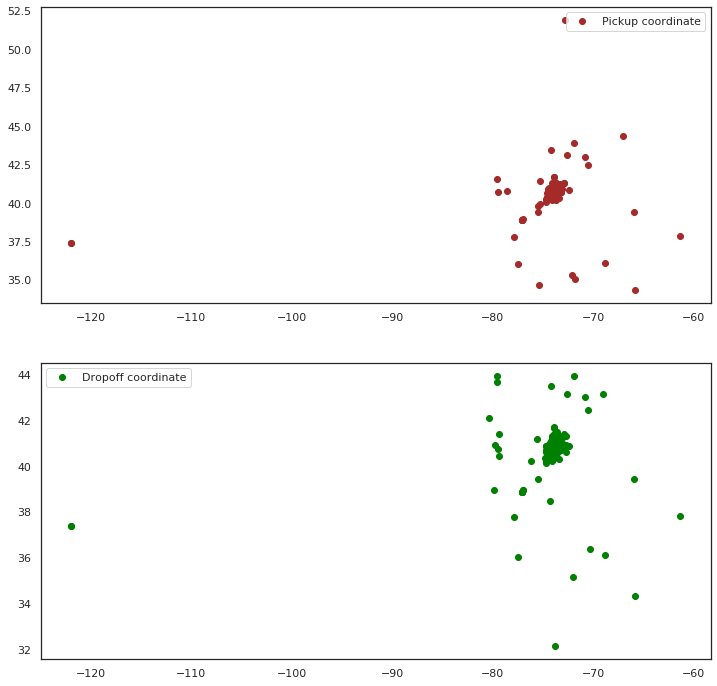

In [7]:
f, axes = plt.subplots(2,figsize=(12, 12), sharex=False, sharey = False)
axes[0].plot(df['pickup_longitude'], df['pickup_latitude'],'o', color="brown", label = "Pickup coordinate")
axes[0].legend()
axes[1].plot(df['dropoff_longitude'], df['dropoff_latitude'] ,'o', color="green",  label = "Dropoff coordinate")
axes[1].legend()
plt.show()

## Chemins à vol d'oiseau
Maintenant représentons l'ensemble des voyages effectués dans notre jeu de données.

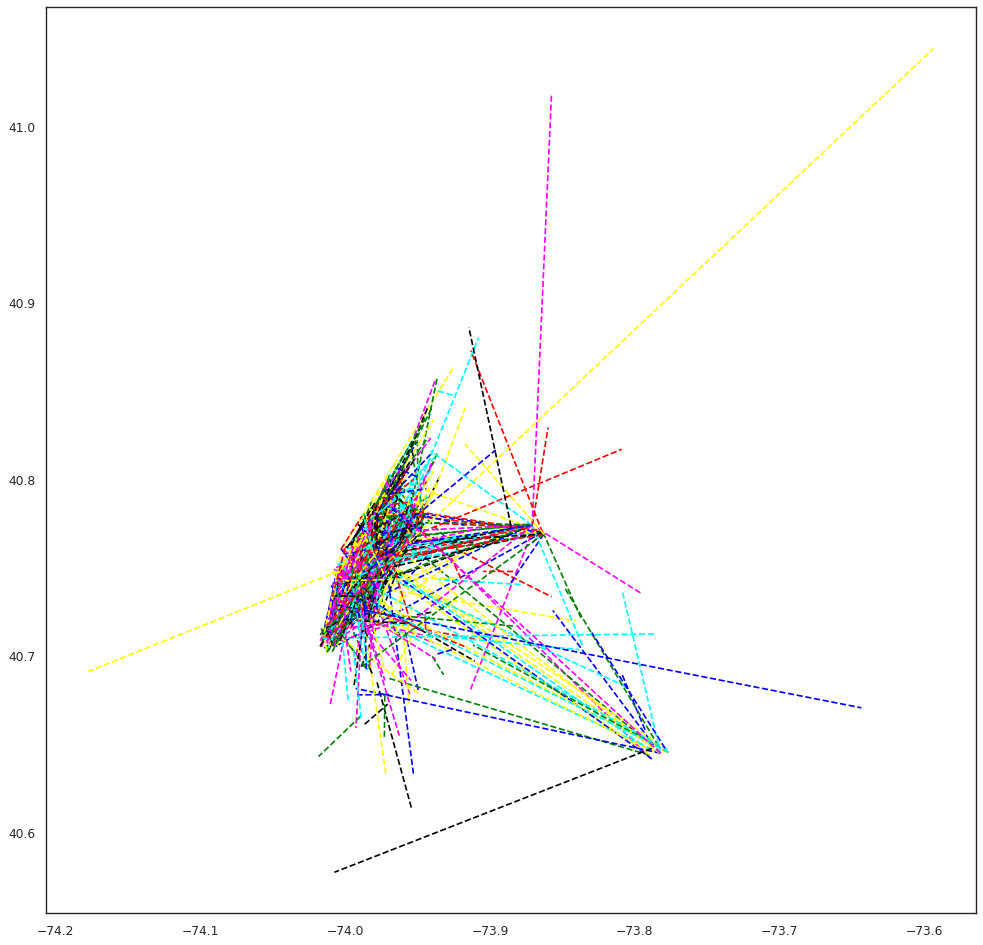

In [8]:
number_trips = 1000

count = 0
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(0, number_trips):
    count += 1
    plt.plot([df['pickup_longitude'][i], df['dropoff_longitude'][i]], [df['pickup_latitude'][i], df['dropoff_latitude'][i]], color=colors[count%7], linestyle="dashed")


Des trois représentations passés on observe facilement une concentration des voyages sur certains secteurs, aspect que l'on pourra encore mieux visualiser grace à une courbe de distribution sur d'une part les longtitudes ainsi que les latitudes de chaque

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


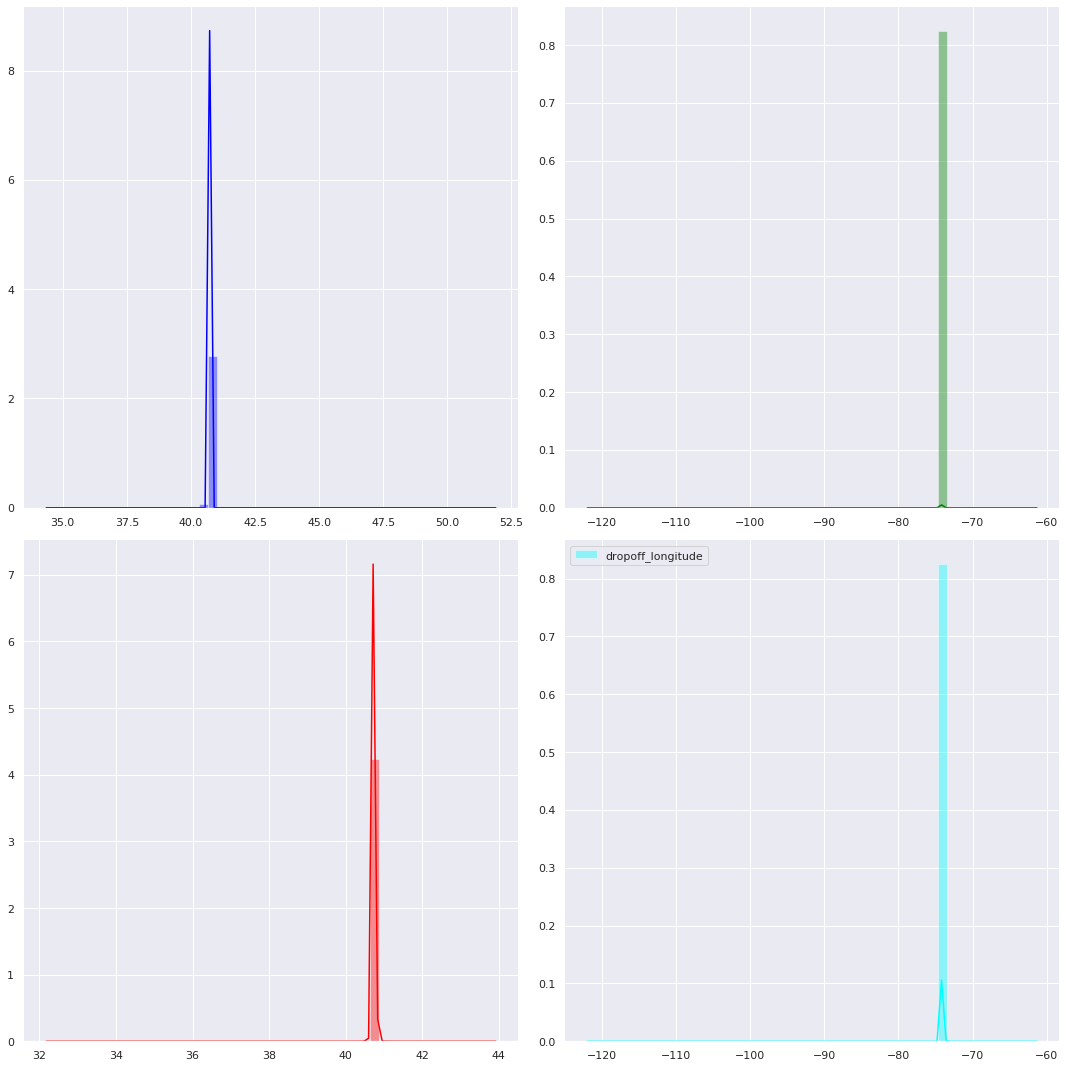

In [9]:
sns.set(color_codes=True)
f, axes = plt.subplots(2,2,figsize=(15, 15))#
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color=colors[0], ax=axes[0,0])
plt.legend()
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color=colors[1], ax=axes[0,1])
plt.legend()
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color=colors[2], ax=axes[1, 0])
plt.legend()
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color=colors[3],ax=axes[1, 1])
plt.legend()
plt.tight_layout()
plt.show()

# Vendor_id
Dans le jeu de données vendor_id ne posséde que deux valeurs uniques, cela représente les sociétés distribuant ces services de transport par taxi. Au vu de ce petit nombre il est intéressant de se demander est ce que les données entre les deux vendor sont très différentes ce qui pourrait créer un intérét à créer un model différent pour chacun d'entre eux.

Vendors différents : [2 1]


Text(0, 0.5, 'Moyenne de Durée de voyage')

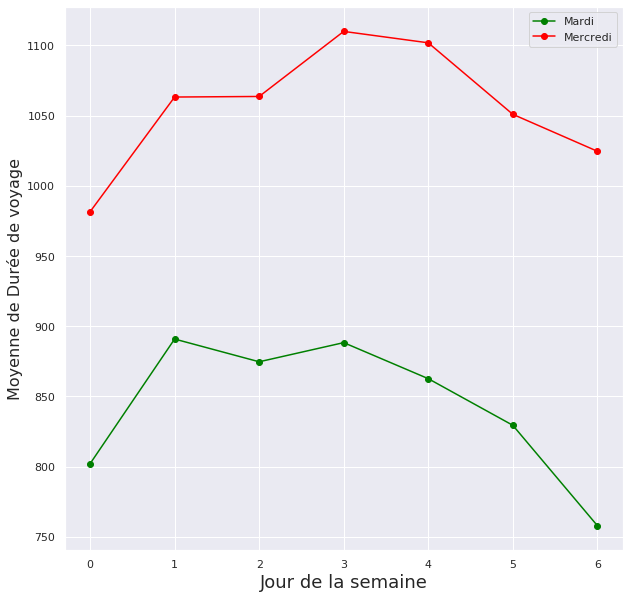

In [10]:
print("Vendors différents : "+str(df.vendor_id.unique()))
fig = plt.figure(figsize=(10,10))
vendors = [1, 2]
dfs_days = []
for i in vendors:
    tmp = df[df['vendor_id'] == i]
    day_week = np.sort(tmp.pick_day_week.unique())
    durations = []
    for j in day_week:
        durations.append(tmp[tmp['pick_day_week']==j]['trip_duration'].mean())

    plt.plot(day_week, durations, color=colors[i], marker="o", label=jours[i])
    plt.legend()
plt.xlabel('Jour de la semaine', fontsize=18)
plt.ylabel('Moyenne de Durée de voyage', fontsize=16)

Une très net différence se creuse entre les durées de voyage des deux vendors en moyenne, et ce quelque soit le jour de la semaine, par conséquent deux models seront utilisés par la suite.

## Nombre de passagers
Interessons nous maintenant à la colonne du nombre de passagers et son impact sur les durées de voyages

Nombre de passagers possible : [1 6 4 2 3 5 0 7 9 8]


Text(0, 0.5, 'Moyenne de Durée de voyage')

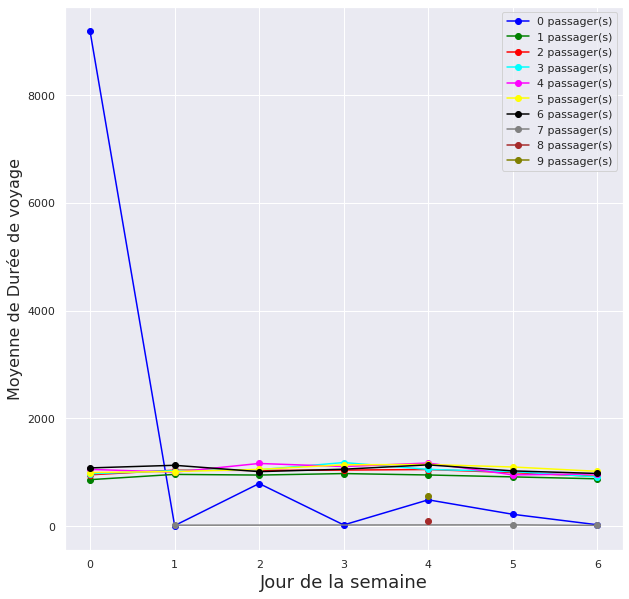

In [11]:
print("Nombre de passagers possible : "+str(df.passenger_count.unique()))
fig = plt.figure(figsize=(10,10))
counts = list(np.sort(df.passenger_count.unique()))
for i in counts:
    tmp = df[df['passenger_count'] == i]
    day_week = np.sort(tmp.pick_day_week.unique())
    durations = []
    for j in day_week:
        durations.append(tmp[tmp['pick_day_week']==j]['trip_duration'].mean())
    plt.plot(day_week, durations, color=colors[i], marker="o", label=str(i)+" passager(s)")
    plt.legend()
plt.xlabel('Jour de la semaine', fontsize=18)
plt.ylabel('Moyenne de Durée de voyage', fontsize=16)

Comme on peut le remarquer le nombre de passagers n'affecte pas réellement la durée des voyages, exception faite du cas ou il y'a 0 passagers ce qui peut être interprété par le fait que le taxi ne fait pas de voyage pour un passager mais pour se déplacer lui même, cependant cette exception très dénotable rend important le fait de garder cette colonne.

# Nettoyage des données 
Il faut maintenant se débarasser :
- Des colonnes non pertinentes : store_and_fwd_flag,
- Les colonnes dont on déduit implicitement la valeur : dropoff_datetime
- Supprimer les valeurs non-définies NaN.

In [12]:
df = df.drop('store_and_fwd_flag', 1)
df = df.drop('dropoff_datetime', 1)
df = df.drop('id', 1)
df = df.dropna(how='any') # Supprimer les lignes dont au moins une des valeurs est NaN ( à remplacer par how = "all" si pour supprimer il faut que le tout soit NaN) 

# Distance 
La distance n'étant pas sous un format cartésien on prépare une fonction qui permettra de nous calculer la distance entre deux coordonnées.

In [13]:
def distance(lat11, long1, lat22, long2):
  R = 6373.0

  lat1 = radians(lat11)
  lon1 = radians(long1)
  lat2 = radians(lat22)
  lon2 = radians(long2)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

On sépare la table en une partie temps : time et une partie pour les coordonnées : dist pour prépare la représentation.

In [14]:
time = df["trip_duration"]
dist = df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]]
print(time.head())
print(dist.head())

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64
   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -73.982155        40.767937         -73.964630         40.765602
1        -73.980415        40.738564         -73.999481         40.731152
2        -73.979027        40.763939         -74.005333         40.710087
3        -74.010040        40.719971         -74.012268         40.706718
4        -73.973053        40.793209         -73.972923         40.782520


On applique la fonction de calcul de distance de manière vecotrielle sur les 4 colonnes concernées ( 2 colonnes pour les coordonnées de départ et 2 pour celles d'arivées )

In [15]:

mdist1 = np.vectorize(distance)(dist['pickup_longitude'], dist['pickup_latitude'], dist['dropoff_longitude'], dist['dropoff_latitude'])

On plot le résultat des calculs par rapport au temps, et on observe des données incohérentes ( représentant le max que ce soit au niveau du temps ou de la distance parcourue ) il peut être intéréssant de les supprimer.

Plus long voyage : 3526282


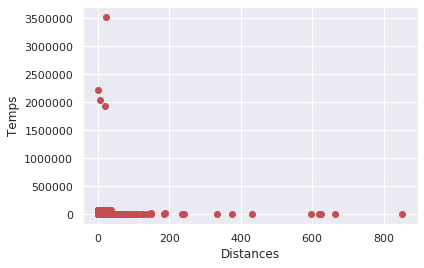

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Distances')
plt.ylabel('Temps')
plt.plot(mdist1, time, 'ro')
print("Plus long voyage : "+str(max(time)))

In [17]:
print(time.head())
print(mdist1)

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64
[1.95058955 2.13284737 3.36009309 ... 5.38025598 0.86429047 0.79611819]


In [18]:
print(time.tail())

1458639    778
1458640    655
1458641    764
1458642    373
1458643    198
Name: trip_duration, dtype: int64


Suppression maximum temps  :
3526282
2227612
2049578
1939736
Suppression maximum distance :
852.2358940913733
663.021715065337
625.0238600444898
619.8612749007566
596.4071500109093
431.3677834180692
376.5159741777411
332.4603909557988
240.09291790327305
236.4495641362785


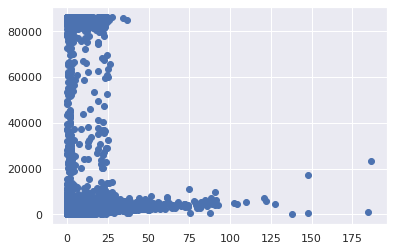

In [19]:
indexes = []
time = time.to_numpy()
print("Suppression maximum temps  :")
for i in range(4):
  ind = np.argmax(time)
  print(str(time[ind]))
  indexes.append(ind)
  time = np.delete(time, (ind), axis=0)
  mdist1 = np.delete(mdist1, (ind), axis=0)

print("Suppression maximum distance :")
for i in range(10):
  ind = np.argmax(mdist1)
  print(str(mdist1[ind]))
  indexes.append(ind)
  mdist1 = np.delete(mdist1, (ind), axis=0)
  time = np.delete(time, (ind), axis=0)


plt.plot(mdist1, time, 'bo')

Maintenant que la répartition est plus cohérente on supprime aussi ces valeurs sur le DataFrame originel, et on observe l'impact sur la distribution :

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


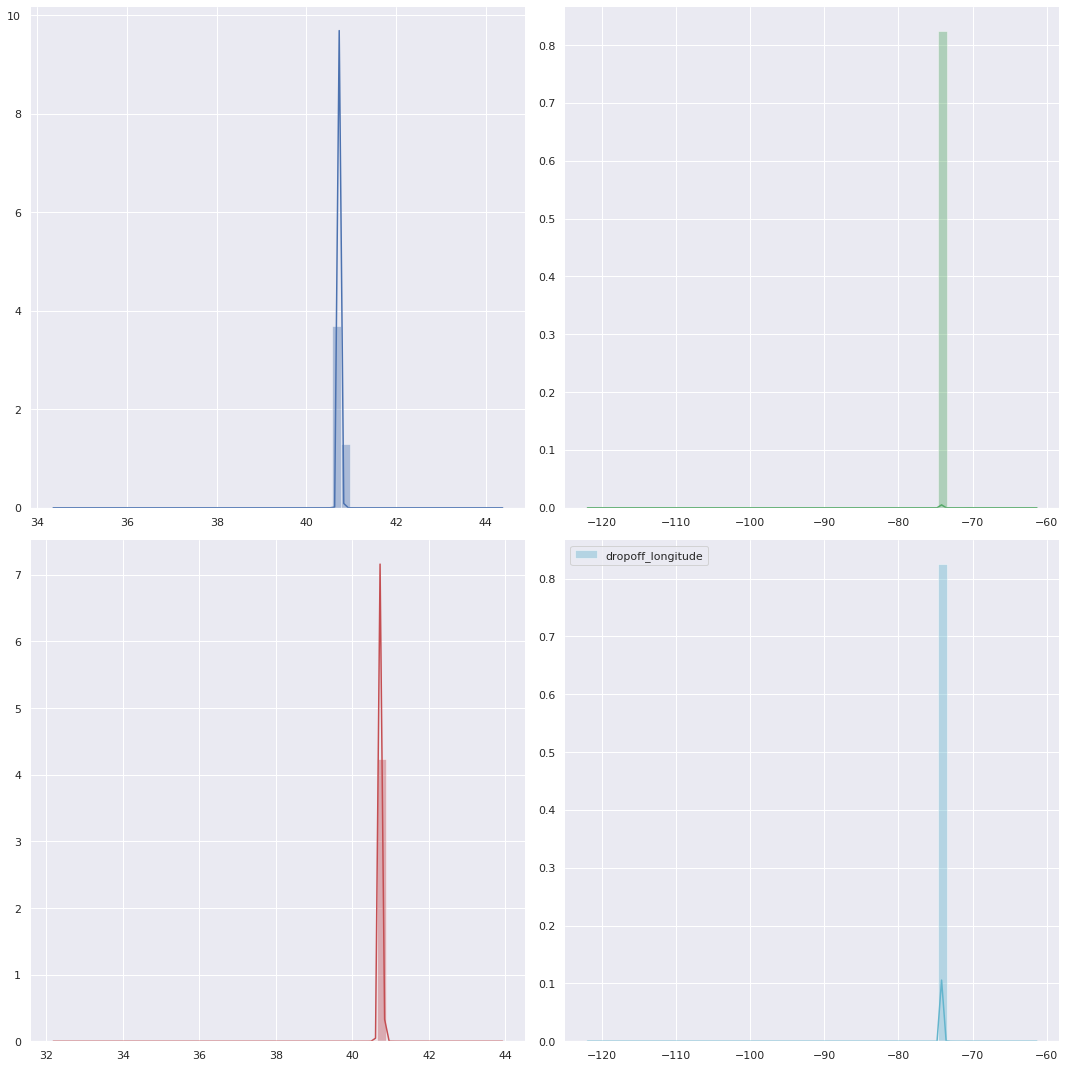

In [20]:
colors = ['b','g','r','c','m','y','k']
for i in indexes:
  df = df.drop(i)
sns.set(color_codes=True)
f, axes = plt.subplots(2,2,figsize=(15, 15))#
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color=colors[0], ax=axes[0,0])
plt.legend()
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color=colors[1], ax=axes[0,1])
plt.legend()
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color=colors[2], ax=axes[1, 0])
plt.legend()
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color=colors[3],ax=axes[1, 1])
plt.tight_layout()
plt.legend()
plt.show()


# Matrice de Covariance
Afin d'analyser la liaison existante entre les différentes colonnes (ou attributs) il est intéréssant de calculer la matrice de covariance.

In [21]:
df = df.drop("pickup_datetime", 1)
print(df)

         vendor_id  passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  pick_month  pick_hour  pick_year  day_of_year  pick_day_week
0                2                1        -73.982155        40.767937         -73.964630         40.765602            455           3         17       2016           74              0
1                1                1        -73.980415        40.738564         -73.999481         40.731152            663           6          0       2016          164              6
2                2                1        -73.979027        40.763939         -74.005333         40.710087           2124           1         11       2016           19              1
3                2                1        -74.010040        40.719971         -74.012268         40.706718            429           4         19       2016           97              2
4                2                1        -73.973053        40.793209     

                   vendor_id  passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  pick_month   pick_hour  pick_year  day_of_year  pick_day_week
vendor_id           0.248779         0.188404          0.000277         0.000033           0.000054          0.000080   5.661264e+01   -0.005221    0.029683        0.0    -0.155149       0.001280
passenger_count     0.188404         1.727233          0.000203        -0.000217          -0.000032         -0.000130   6.134202e+01   -0.004744    0.076525        0.0    -0.121147       0.064689
pickup_longitude    0.000277         0.000203          0.005026         0.000044           0.003925          0.000255   9.096951e+00    0.000533    0.004602        0.0     0.015575      -0.002268
pickup_latitude     0.000033        -0.000217          0.000044         0.000996           0.000267          0.000583  -4.603123e+00   -0.000091    0.002197        0.0    -0.004554      -0.001877
dropoff_longitude   

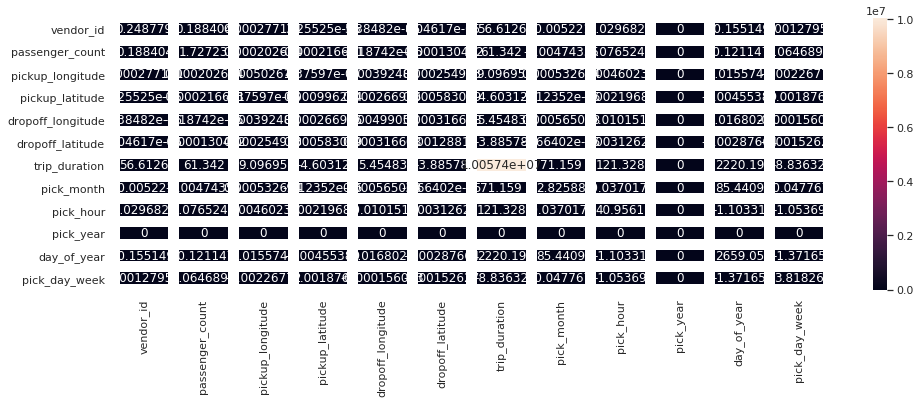

In [22]:
covariance_matrice = pd.DataFrame.cov(df)
print(str(covariance_matrice))
plt.figure(figsize = (16,5))
sns.heatmap(covariance_matrice, annot=True, fmt='g', linewidths=10)
print(mdist1[-1])

In [23]:
df.loc[:, 'pick_month'] = mdist1
print(df.head())
print("Colonnes : "+str(df.columns))

   vendor_id  passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  pick_month  pick_hour  pick_year  day_of_year  pick_day_week
0          2                1        -73.982155        40.767937         -73.964630         40.765602            455    1.950590         17       2016           74              0
1          1                1        -73.980415        40.738564         -73.999481         40.731152            663    2.132847          0       2016          164              6
2          2                1        -73.979027        40.763939         -74.005333         40.710087           2124    3.360093         11       2016           19              1
3          2                1        -74.010040        40.719971         -74.012268         40.706718            429    0.475668         19       2016           97              2
4          2                1        -73.973053        40.793209         -73.972923         40.782520    

# Separation des données 
Au vu des données analysées nous avons déduit l'importance d'avoir un model pour chaque vendor, ce qui signifie dans un premier temps qu'il va falloir séparer le jeu de données en deux un pour chaque vendor.
Dans un second temps chacun de ces jeu de données résultants devra être séparé en données d'entrainement et de test.

In [24]:
vendor1_df = df[df["vendor_id"]==1]
vendor2_df = df[df["vendor_id"]==2]


Y1 = vendor1_df['trip_duration']
X1 = vendor1_df.drop(["trip_duration"], 1)
from sklearn.model_selection import train_test_split
X1_new = np.array(X1)
Y1_new = np.array(Y1.transpose())
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_new, Y1_new, test_size=0.33, random_state=42)


Y2 = vendor2_df['trip_duration']
X2 = vendor2_df.drop(["trip_duration"], 1)
from sklearn.model_selection import train_test_split
X2_new = np.array(X2)
Y2_new = np.array(Y2.transpose())
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_new, Y2_new, test_size=0.33, random_state=42)

# Phase d'entrainement 
On commence par définir la métrique qui nous sera utile pour chacune des méthodes et celle requise pour la compétition.

In [25]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_test, predictions):
    return np.sqrt(mean_squared_log_error( y_test, predictions ))

## Regression Linéaire
L'exemple de  la regression linéaire donnera forcément un résultat négatif, au vu du fait qu'il n'a aucune fonction d'activation pour le faire respecter une certaine plage de valeurs. Cela implique donc forcément une erreur car le RMSLE n'accepte que des valeurs positifs.

In [26]:
def train_loop(X_train, X_test, y_train, y_test):
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, rmsle(y_test, y_pred)
    
print("X1_train : "+str(X1_train))
print("y1_train : "+str(y1_train))
regression_vendor1, rmsle1 = train_loop(X1_train, X1_test, y1_train, y1_test)
regression_vendor2, rmsle2 = train_loop(X2_train, X2_test, y2_train, y2_test)
print("RMSLE du model pour le vendor 1 : "+str(rmsle1))
print("RMSLE du model pour le vendor 1 : "+str(rmsle2))

X1_train : [[ 1.00000000e+00  1.00000000e+00 -7.39818802e+01 ...  2.01600000e+03
   6.20000000e+01  2.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -7.39898987e+01 ...  2.01600000e+03
   5.20000000e+01  6.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -7.39745483e+01 ...  2.01600000e+03
   8.30000000e+01  2.00000000e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00 -7.39680328e+01 ...  2.01600000e+03
   3.50000000e+01  3.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -7.40085526e+01 ...  2.01600000e+03
   1.63000000e+02  5.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -7.39884186e+01 ...  2.01600000e+03
   1.77000000e+02  5.00000000e+00]]
y1_train : [431 105 256 ... 297 938 434]


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

## Réseaux de neurones

In [27]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'exponential', 'elu', 'linear'] # Linear better with mean squared error
opts = ['sgd', 'adam','rmsprop'] # Algorithmes d'optimisation : https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f

def train_fit_test(model, train_x, train_y, test_x, test_y, optimizer): # Fonction selectionant la fonction  d'optimisation et lançant l'apprentissage
    if optimizer=="adam":
      opt = optimizers.RMSprop(lr=1e-4)
    elif optimizer=="sgd":
      opt = optimizers.SGD(lr=1e-4)
    else:
      opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='mse',
              optimizer=opt,
              metrics=['mse'])
    model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=16)
    y_pred = model.predict(test_x) # Utilise le model pour effectuer des prédictions sur les données de test
    score = rmsle_evaluate(np.array(test_y), np.array(y_pred))   # Comparaison de mesure de précision entre les vrais labels et ceux prédits 
    return score

def create_model(num_layers, num_neurons, activation): # Fonction permettant la génération d'une architecture 
    model = Sequential()
    model.add(Dense(64, input_dim=11)) # On commence  par ajouter une première couche avec un nombre de neurones correspondant à notre input
    for i in range(num_layers):
      model.add(Dense(units=num_neurons, activation=activation))
    model.add(Dense(units=1, activation='relu'))
    return model

def training_loop(index, X_train, X_test, y_train, y_test):
    print("ENTRAINEMENT VENDOR "+str(index))
    best_score = 999999 #  On initialise la meilleure precision à un nombre négatif
    best_model = []
    layers = [50, 100, 1000, 1500, 2000] # Différents nombre de neurones par couche

    for x in range(3): # Boucle du nombre de neurones par couche
      for j in layers: # Boucle du nombre de couches
          for i in  range(3, 10): # Boucle de retrain pour reinitialiser le model et eviter le problème  des minimums locaux
            for activ in activation_functions:
              for optimizer  in opts:
                model = create_model(i, j, activ) # Créer notre modèle avec la fonction défini plus haut et les paramètres définie par les variables des boucles
                model.summary() # Affiche le model  produit
                rmsle_score = train_fit_test(model, X_train, y_train, X_test, y_test, optimizer)  # Fonction qui lance l'apprentissage
                print("||||| RMSLE : "+str(rmsle_score)+" |||||")
                print("\n")
                with open("infos_appauto vendor "+str(index)+".txt",'a+') as fh:
                  model.summary(print_fn=lambda x: fh.write(x + '\n'))
                  fh.write("\n RMSLE : "+str(rmsle_score)+"\n")
                  fh.close()
                if (rmsle_score < best_score): # Si le model a donnéé le meilleur resultat on le sauvegarde et garde en mémoire ses résultats
                  print("\n\n")
                  print(" BEST MODEL ! ")
                  print("Saving... ")
                  print("\n\n")
                  v = open("meilleur_model vendor "+str(index)+".txt","w")
                  v.write(str(rmsle_score))
                  v.close()
                  model.save("meilleur_model vendor "+str(index)+".h5")
                  best_score = rmsle_score
                  best_model = model

training_loop(1, X1_train, X1_test, y1_train, y1_test)
training_loop(2, X2_train, X2_test, y2_train, y2_test)

ENTRAINEMENT VENDOR 1



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 9,169
Trainable params: 9,169
Non-trainable params: 0
_________________________________________________________________



Epoch 1/100
222656/454483 [=============>................] - ETA: 9s - loss: nan - mean_squared_error: nan

KeyboardInterrupt: 